# Exploration du dataset SMSSpam

## Importation du dataset et formatation des données

In [1]:
import pandas as pd

# Charger le fichier brut
file_path = "SMSSpamCollection"
data = []

# Lire et traiter chaque ligne
with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip().replace("\t", " ")  # Remplacer les tabulations par des espaces
        if line:  # Vérifier si la ligne n'est pas vide
            parts = line.split(" ", 1)  # Séparer au premier espace
            if len(parts) == 2:  # Vérifier qu'il y a bien deux parties
                label, message = parts
                data.append((label, message))  # Ajouter le label et le message

# Transformer en DataFrame
df = pd.DataFrame(data, columns=["Label", "Message"])

# Aperçu des données
print(df.head())

# Sauvegarder au format CSV pour réutilisation future
df.to_csv("sms_spam_dataset.csv", index=False)

print("Dataset corrigé et sauvegardé sous 'sms_spam_dataset.csv'.")

  Label                                            Message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
Dataset corrigé et sauvegardé sous 'sms_spam_dataset.csv'.


## Première analyse des données: comptage des labels pour observer les éventuels déséquilibres

  Label                                            Message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Description des données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5574 non-null   object
 1   Message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

Répartition des classes :
ham     4827
spam     747
Name: Label, dtype: int64


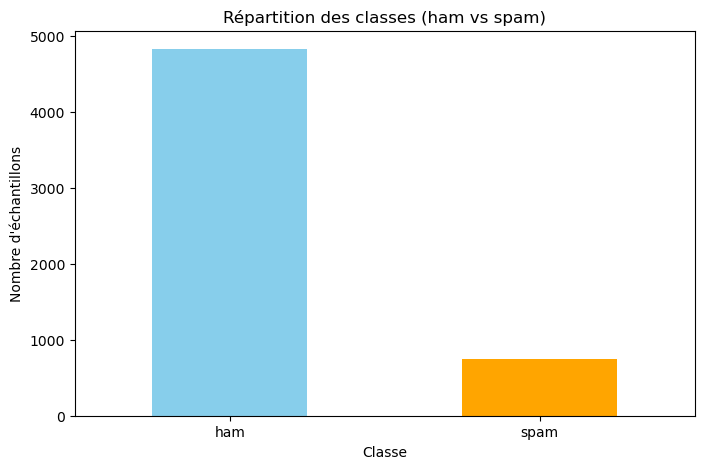

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le dataset corrigé
file_path = "sms_spam_dataset.csv"  # Remplacez par le chemin de votre fichier
df = pd.read_csv(file_path)

# Vérification des données
print(df.head())  # Afficher les premières lignes
print("\nDescription des données :")
print(df.info())  # Informations sur le DataFrame

# Comptage des classes
class_counts = df['Label'].value_counts()

# Affichage des résultats
print("\nRépartition des classes :")
print(class_counts)

# Visualisation des classes
plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Répartition des classes (ham vs spam)")
plt.xlabel("Classe")
plt.ylabel("Nombre d'échantillons")
plt.xticks(rotation=0)

# Enregistrement du graphique
plt.savefig("repartition_classes.png", dpi=300, bbox_inches='tight')  # Enregistre en haute qualité
plt.show()

## Division des données avec stratify=y et observations des classes

In [3]:
from sklearn.model_selection import train_test_split

# Séparer les caractéristiques (messages) et les labels (ham/spam)
X = df['Message']
y = df['Label']

# Division des données en ensembles d'entraînement et de test (avec stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Affichage des proportions dans chaque ensemble
print("Proportions dans l'ensemble d'entraînement :")
print(y_train.value_counts(normalize=True))

print("\nProportions dans l'ensemble de test :")
print(y_test.value_counts(normalize=True))

Proportions dans l'ensemble d'entraînement :
ham     0.865932
spam    0.134068
Name: Label, dtype: float64

Proportions dans l'ensemble de test :
ham     0.866109
spam    0.133891
Name: Label, dtype: float64


#### Visualisation des données après la division

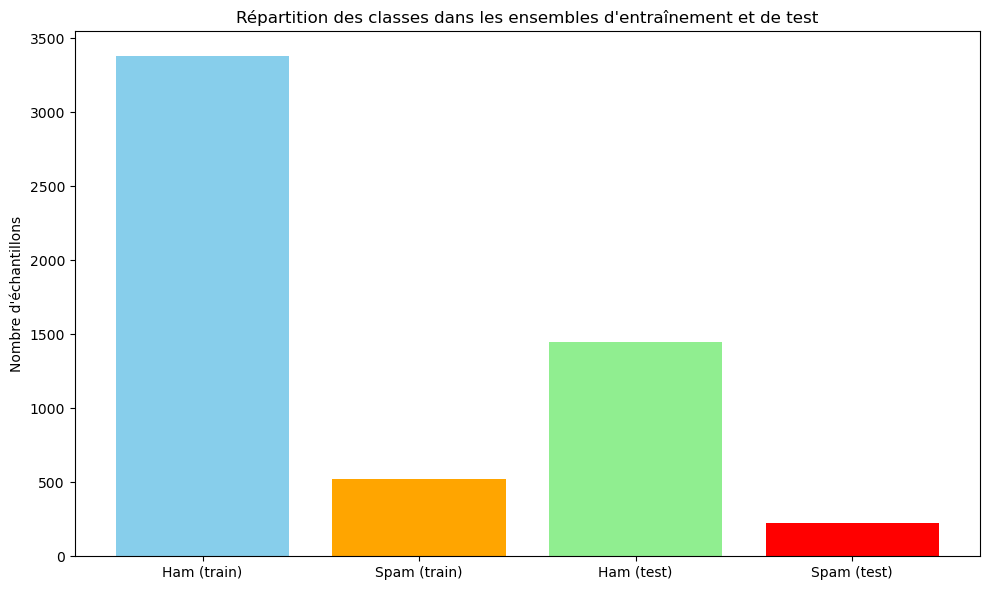

In [4]:
import matplotlib.pyplot as plt

# Distribution des classes dans l'ensemble d'entraînement
train_class_counts = y_train.value_counts()
test_class_counts = y_test.value_counts()

# Création du graphique
plt.figure(figsize=(10, 6))
plt.bar(["Ham (train)", "Spam (train)", "Ham (test)", "Spam (test)"],
        [train_class_counts['ham'], train_class_counts['spam'],
         test_class_counts['ham'], test_class_counts['spam']],
        color=['skyblue', 'orange', 'lightgreen', 'red'])

plt.title("Répartition des classes dans les ensembles d'entraînement et de test")
plt.ylabel("Nombre d'échantillons")
plt.tight_layout()

# Enregistrement
plt.savefig("repartition_classes_train_test.png")
plt.show()

#### Vérification de la longueur moyenne des messages par classe

Longueur moyenne des messages par classe :
Label
ham      71.440025
spam    138.634538
Name: Length, dtype: float64


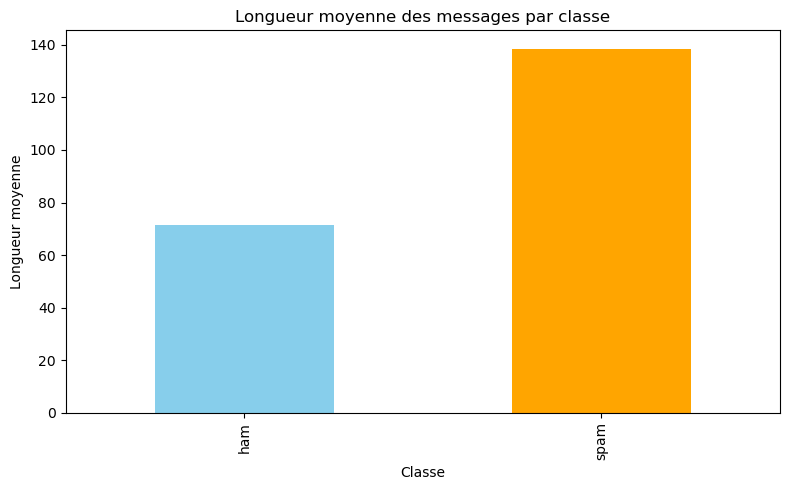

In [5]:
# Ajouter une colonne pour la longueur des messages
df['Length'] = df['Message'].apply(len)

# Calcul de la longueur moyenne des messages par classe
length_by_class = df.groupby('Label')['Length'].mean()

print("Longueur moyenne des messages par classe :")
print(length_by_class)

# Visualisation
plt.figure(figsize=(8, 5))
length_by_class.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Longueur moyenne des messages par classe")
plt.ylabel("Longueur moyenne")
plt.xlabel("Classe")
plt.tight_layout()

# Enregistrement
plt.savefig("longueur_messages_par_classe.png")
plt.show()

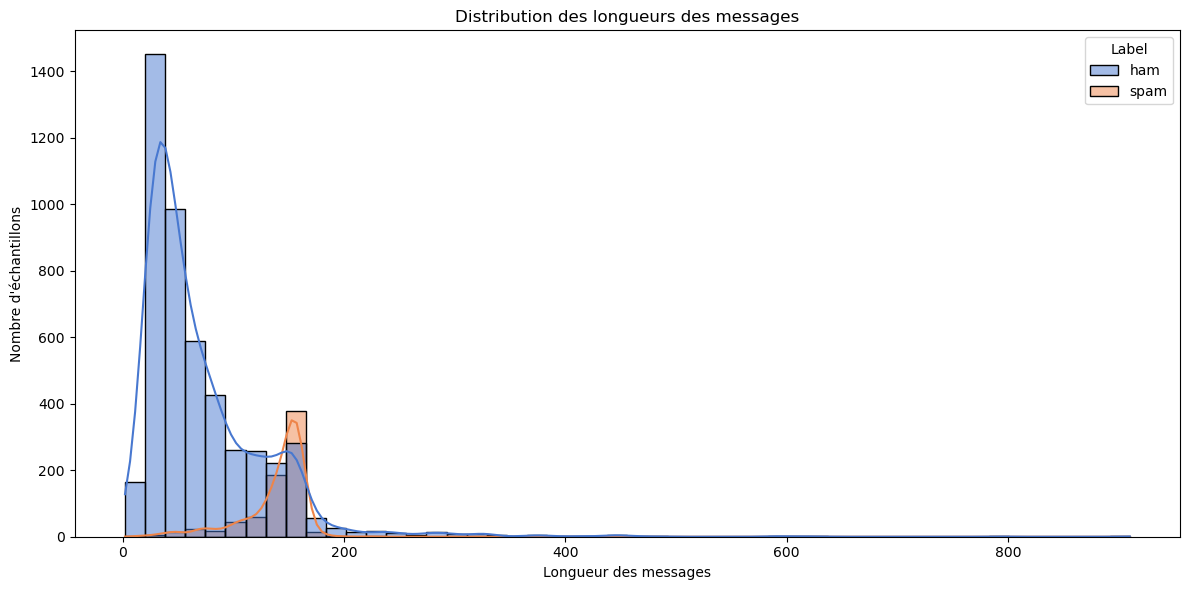

In [6]:
import seaborn as sns

# Distribution des longueurs
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Length', hue='Label', kde=True, bins=50, palette='muted')
plt.title("Distribution des longueurs des messages")
plt.xlabel("Longueur des messages")
plt.ylabel("Nombre d'échantillons")
plt.tight_layout()

# Enregistrement
plt.savefig("distribution_longueurs_messages.png")
plt.show()

#### Analyse textuelle: identifiacation des mots les plus fréquents

Mots les plus fréquents dans les spams : [('to', 607), ('a', 360), ('your', 187), ('call', 185), ('or', 185), ('the', 178), ('2', 169), ('for', 169), ('you', 164), ('is', 143), ('Call', 136), ('on', 136), ('have', 128), ('and', 119), ('from', 116), ('ur', 107), ('with', 101), ('&', 98), ('4', 93), ('of', 93)]
Mots les plus fréquents dans les ham : [('to', 1538), ('you', 1462), ('I', 1439), ('the', 1029), ('a', 977), ('i', 742), ('and', 739), ('in', 736), ('u', 651), ('is', 645), ('my', 621), ('me', 541), ('of', 499), ('for', 481), ('that', 399), ('it', 376), ('your', 374), ('on', 352), ('have', 349), ('at', 334)]


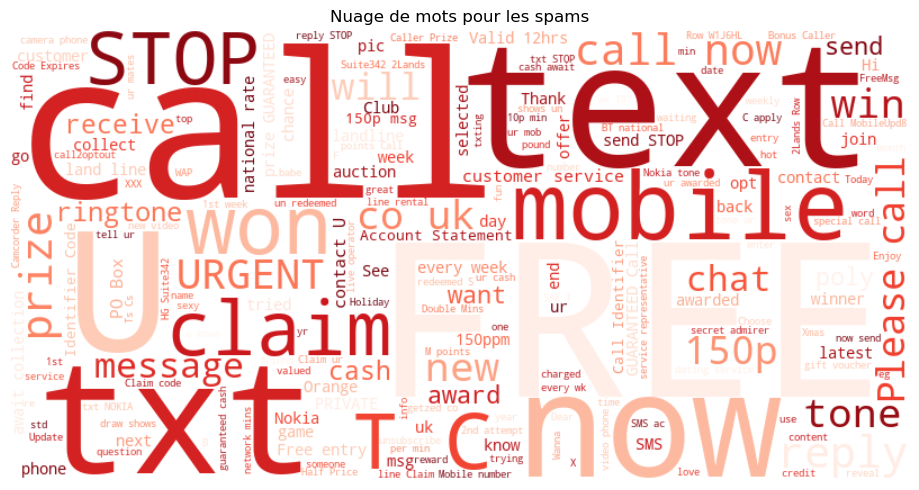

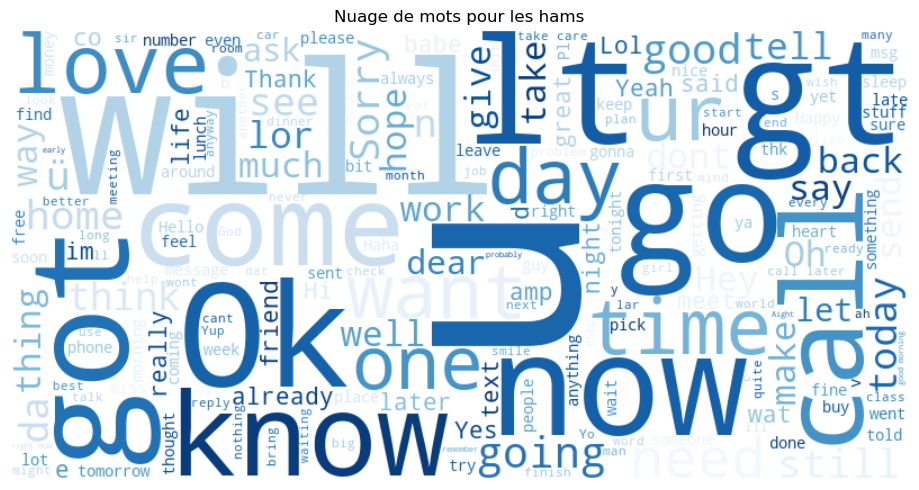

In [7]:
from collections import Counter
from wordcloud import WordCloud

# Fonction pour obtenir les mots fréquents dans une classe
def get_frequent_words(messages, n=20):
    words = " ".join(messages).split()
    most_common = Counter(words).most_common(n)
    return most_common

# Mots les plus fréquents dans les spams
spam_words = get_frequent_words(df[df['Label'] == 'spam']['Message'])
print("Mots les plus fréquents dans les spams :", spam_words)

# Mots les plus fréquents dans les ham
ham_words = get_frequent_words(df[df['Label'] == 'ham']['Message'])
print("Mots les plus fréquents dans les ham :", ham_words)

# Nuages de mots
for label, color in [('spam', 'Reds'), ('ham', 'Blues')]:
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color).generate(
        " ".join(df[df['Label'] == label]['Message']))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Nuage de mots pour les {label}s")
    plt.tight_layout()
    plt.savefig(f"nuage_de_mots_{label}.png")
    plt.show()

## Vectorisation des données textuelles avec TD-IDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instancier le TfidfVectorizer
vectorizer = TfidfVectorizer(
    max_features=5000,  # Limiter le nombre maximal de caractéristiques
    stop_words='english',  # Supprimer les mots vides en anglais
    ngram_range=(1, 2)  # Prendre en compte les unigrammes et bigrammes
)

# Ajuster le vectoriseur sur les données d'entraînement et transformer
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transformer les données de test
X_test_tfidf = vectorizer.transform(X_test)

# Afficher les dimensions des matrices résultantes
print(f"Dimensions des données vectorisées (TF-IDF) - Entraînement : {X_train_tfidf.shape}")
print(f"Dimensions des données vectorisées (TF-IDF) - Test : {X_test_tfidf.shape}")

Dimensions des données vectorisées (TF-IDF) - Entraînement : (3901, 5000)
Dimensions des données vectorisées (TF-IDF) - Test : (1673, 5000)


In [9]:
# Extraire les termes et leurs scores
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = X_train_tfidf.mean(axis=0).A1  # Moyenne des scores TF-IDF
term_scores = list(zip(feature_names, tfidf_scores))

# Trier les termes par importance
sorted_terms = sorted(term_scores, key=lambda x: x[1], reverse=True)[:20]

# Afficher les termes les plus importants
print("Les termes avec les scores TF-IDF moyens les plus élevés :")
for term, score in sorted_terms:
    print(f"{term}: {score:.4f}")

Les termes avec les scores TF-IDF moyens les plus élevés :
ok: 0.0170
ll: 0.0127
just: 0.0127
come: 0.0117
gt: 0.0111
lt: 0.0110
got: 0.0109
ur: 0.0107
know: 0.0107
good: 0.0106
lt gt: 0.0098
home: 0.0098
time: 0.0096
like: 0.0096
want: 0.0095
going: 0.0092
free: 0.0089
sorry: 0.0089
lor: 0.0088
da: 0.0085


In [10]:
# Sauvegarde des matrices TF-IDF pour un éventuel besoin ultérieur
import scipy.sparse
scipy.sparse.save_npz("X_train_tfidf.npz", X_train_tfidf)
scipy.sparse.save_npz("X_test_tfidf.npz", X_test_tfidf)

## Entraînement des modèles de classification

### Entraînement de SVM, Naives Bayes et k-nearest neighors (dans l'étude déjà existante) + logistic regression, random forest, gradient boosting 

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score
import pandas as pd

# Initialisation des modèles (sauf KNN)
models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(dual=False),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Entraînement et évaluation
results = []

for model_name, model in models.items():
    print(f"Entraînement du modèle : {model_name}")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    # Évaluation
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label='spam')  # Positif = spam
    results.append({"Modèle": model_name, "Accuracy": accuracy, "F1-Score": f1})
    
    # Rapport détaillé
    print(f"\nRapport de classification pour {model_name} :")
    print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

# Sauvegarder les résultats dans un DataFrame
results_df = pd.DataFrame(results)

Entraînement du modèle : Naive Bayes

Rapport de classification pour Naive Bayes :
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1449
        spam       1.00      0.82      0.90       224

    accuracy                           0.98      1673
   macro avg       0.99      0.91      0.94      1673
weighted avg       0.98      0.98      0.97      1673

Entraînement du modèle : SVM

Rapport de classification pour SVM :
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1449
        spam       0.98      0.91      0.94       224

    accuracy                           0.98      1673
   macro avg       0.98      0.95      0.97      1673
weighted avg       0.98      0.98      0.98      1673

Entraînement du modèle : Logistic Regression

Rapport de classification pour Logistic Regression :
              precision    recall  f1-score   support

         ham       0.97      1.00      0.9

#### Test pour l'entraînement de KNN qui nécessite un formatage des données différent

In [18]:
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
# import pandas as pd  # No need for pandas here

# Normalization des données pour KNN
X_train_knn = normalize(X_train_tfidf)
X_test_knn = normalize(X_test_tfidf)

# Instead of converting to DataFrame, use .toarray() to get a dense numpy array
X_train_knn = X_train_knn.toarray()
X_test_knn = X_test_knn.toarray()

# Réduction de dimensions pour KNN avec PCA (optionnel)
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_knn) # Pass the numpy array here
X_test_pca = pca.transform(X_test_knn) # Pass the numpy array here

# Entraînement du modèle KNN
try:
    print("\nTest avec KNN sur données normalisées et réduites...")
    knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
    knn.fit(X_train_pca, y_train)
    y_pred_knn = knn.predict(X_test_pca)

    # Évaluation
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    f1_knn = f1_score(y_test, y_pred_knn, pos_label='spam')
    print(f"Accuracy KNN : {accuracy_knn:.4f}")
    print(f"F1-Score KNN : {f1_knn:.4f}")
    print("\nRapport de classification pour KNN :")
    print(classification_report(y_test, y_pred_knn, target_names=['ham', 'spam']))
except Exception as e:
    print(f"Erreur pendant l'entraînement ou la prédiction avec KNN : {e}")


Test avec KNN sur données normalisées et réduites...
Erreur pendant l'entraînement ou la prédiction avec KNN : 'NoneType' object has no attribute 'split'
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB 1.3 MB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.8 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 648.8 kB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.2/11.1 MB 5.3 MB/s eta 0:00:03
    --------------------------------------- 0.2/11.1 MB 3.9 MB/s eta 0:00:03
    --------------------------------------- 0.3/11.1 MB 2.8 MB/s eta 0:00:04
   - -------------------------------------- 0.4/11.1 MB 2.1 MB/s eta 0:00:06
   

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 2.2.1 which is incompatible.
pyfume 0.3.4 requires numpy==1.24.4, but you have numpy 2.2.1 which is incompatible.
pyfume 0.3.4 requires scipy==1.10.1, but you have scipy 1.14.1 which is incompatible.
tables 3.8.0 requires blosc2~=2.0.0, but you have blosc2 2.6.2 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
